In [2]:
import matplotlib.pyplot as plt

In [3]:
def plot_sample_data(file_path):
    # Initialize a dictionary to hold the data
    data = {}

    # Open the file and process each line
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()  # Clean spaces and newline characters
            sample_info = line.split(': ')  # Split the line into 'Sample X' and 'Y'
            sample_number = int(sample_info[0].split(' ')[1]) 
            sample_value = int(sample_info[1])
            data[sample_number] = sample_value  

    # Extract the sample numbers and their corresponding values
    samples = list(data.keys())
    values = list(data.values())

    # Create a figure for plotting
    plt.figure(figsize=(12, 6))
    plt.plot(samples, values, label='Sample Data') 
    plt.title('Sample Data Visualization') 
    plt.xlabel('Sample Number') 
    plt.ylabel('Value') 
    plt.grid(True)  
    plt.legend()  
    plt.show() 

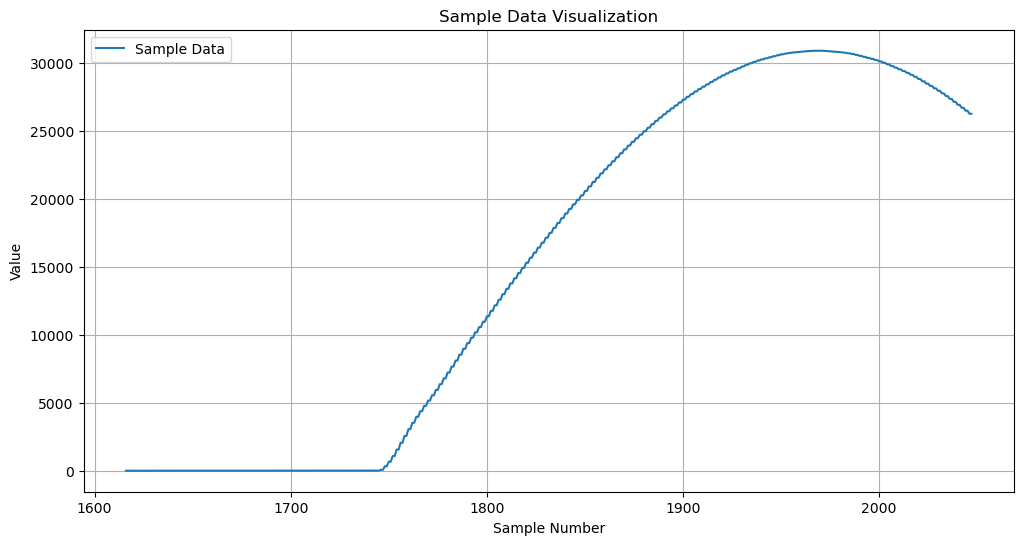

In [16]:
plot_sample_data('samples.txt')

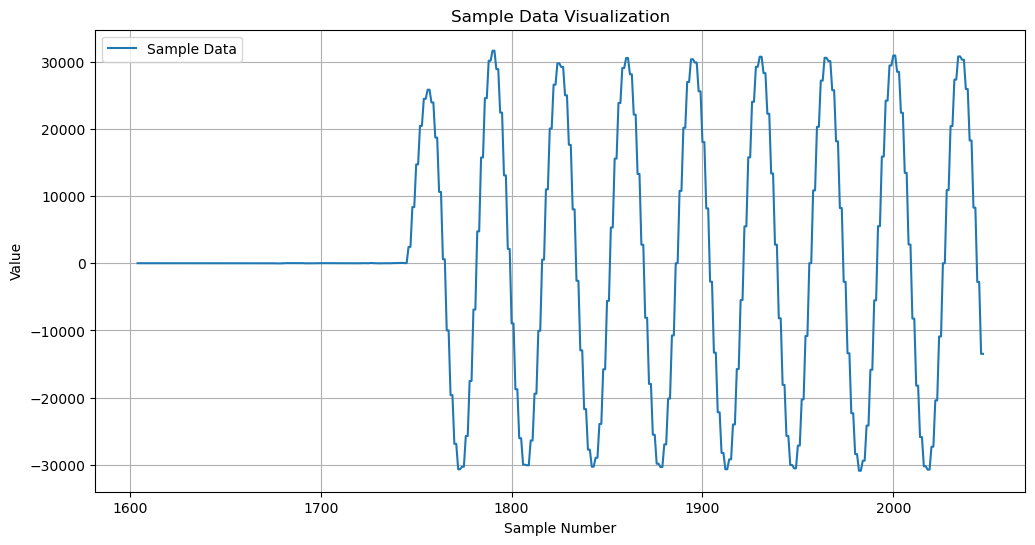

In [5]:
plot_sample_data('samples2.txt')

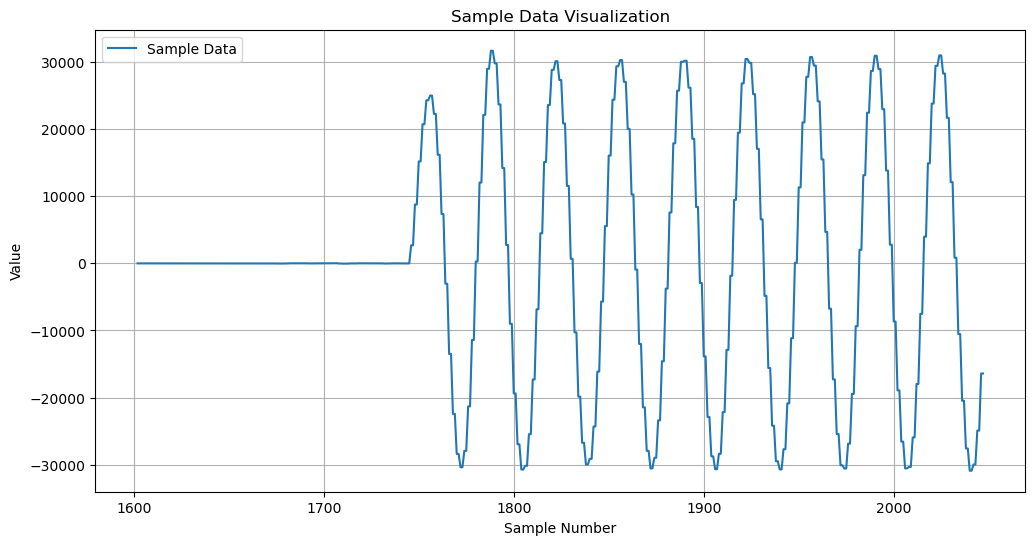

In [6]:
plot_sample_data('samples3.txt')

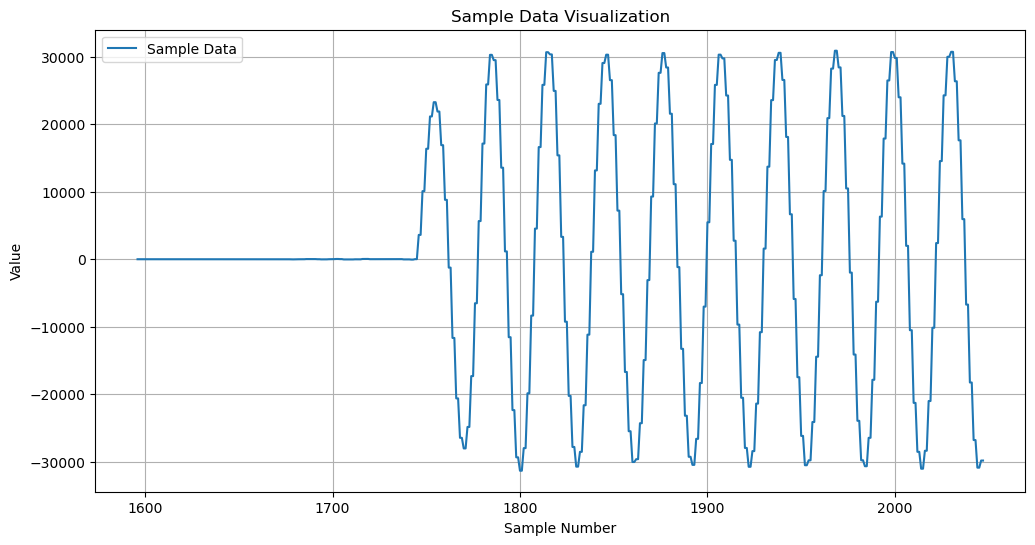

In [7]:
plot_sample_data('samples4.txt')

In [51]:
import matplotlib.pyplot as plt

def plot_output_data_onechannel(file_path, max_samples=None):
    # Initialize a list to hold the values
    values = []

    # Open the file and process each line
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()  # Clean spaces and newline characters
            if line.startswith('Sample'):  # Check if the line contains sample data
                sample_value = int(line.split(': ')[1])
                values.append(sample_value)
                # Break the loop if the maximum number of samples has been reached
                if max_samples is not None and len(values) >= max_samples:
                    break

    # Create a figure for plotting
    plt.figure(figsize=(12, 6))
    plt.plot(values, marker='o', linestyle='-', color='b', label='Sample Data')
    plt.title('Sample Data Visualization')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
# plot_sample_data('path_to_your_file.txt', max_samples=100)


In [1]:
import matplotlib.pyplot as plt

def plot_output_data(file_path, start_sample=0, end_sample=None, max_samples=None):
    # Initialize lists to hold the values for both channels
    left_channel = []
    right_channel = []
    index = 0

    # Open the file and process each line
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()  # Clean spaces and newline characters
            if line.startswith('Sample'):  # Check if the line contains sample data
                if index >= start_sample and (end_sample is None or index <= end_sample):
                    sample_value = int(line.split(': ')[1])
                    
                    # Assign samples to channels based on their index (even or odd)
                    if index % 2 == 0:
                        left_channel.append(sample_value)
                    else:
                        right_channel.append(sample_value)
                
                index += 1
                
                # Break the loop if the maximum number of samples has been reached
                if max_samples is not None and len(left_channel) + len(right_channel) >= max_samples:
                    break

     # Create a figure for plotting
    plt.figure(figsize=(12, 6))
    
    # Plotting each channel with different colors
    plt.plot(left_channel, marker='o', linestyle='-', color='blue', label='Left Channel')
    plt.plot(right_channel, marker='o', linestyle='-', color='red', label='Right Channel')
    
    plt.title('Sample Data Visualization')
    plt.xlabel('Sample Index')
    plt.ylabel('Sample Value')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage:
# plot_output_data('path_to_your_file.txt', start_sample=500, end_sample=2500)


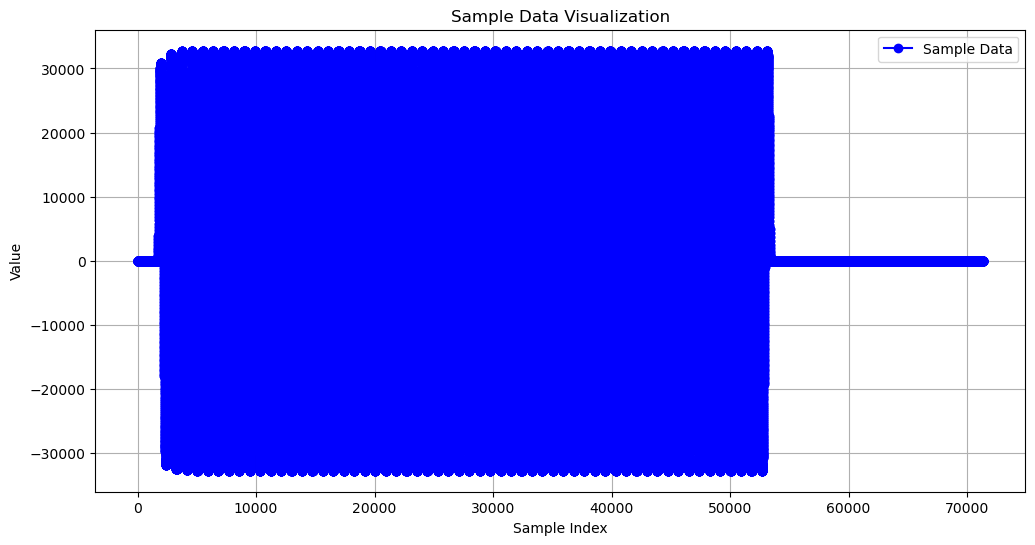

In [52]:
plot_output_data_onechannel('output1.txt')

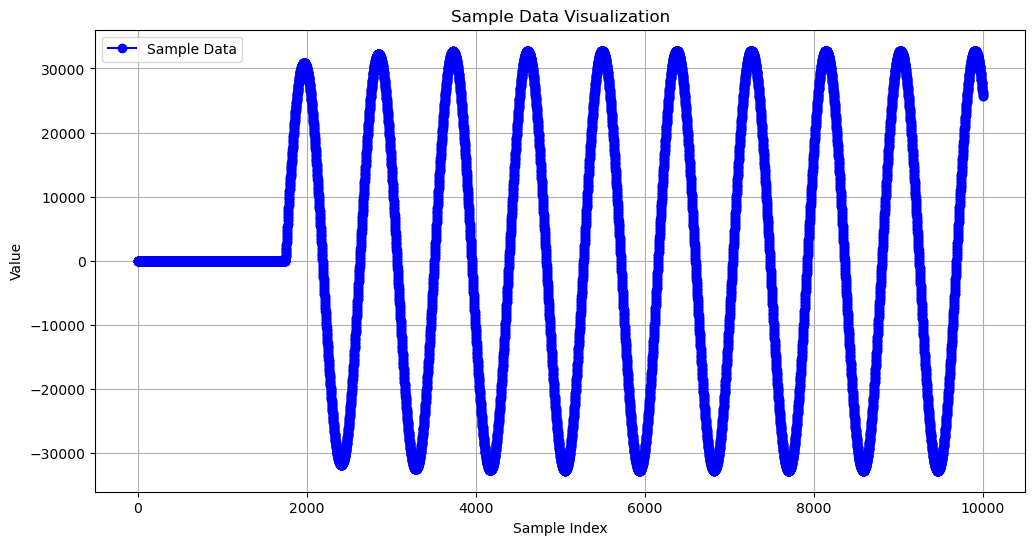

In [10]:
plot_output_data_onechannel('output1.txt', 10000)

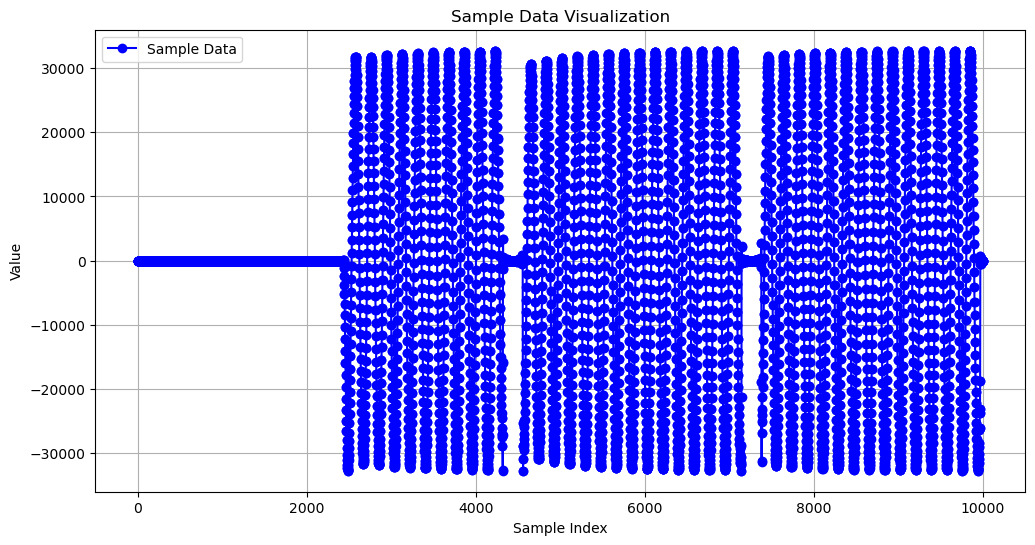

In [11]:
plot_output_data_onechannel('output2.txt', 10000)

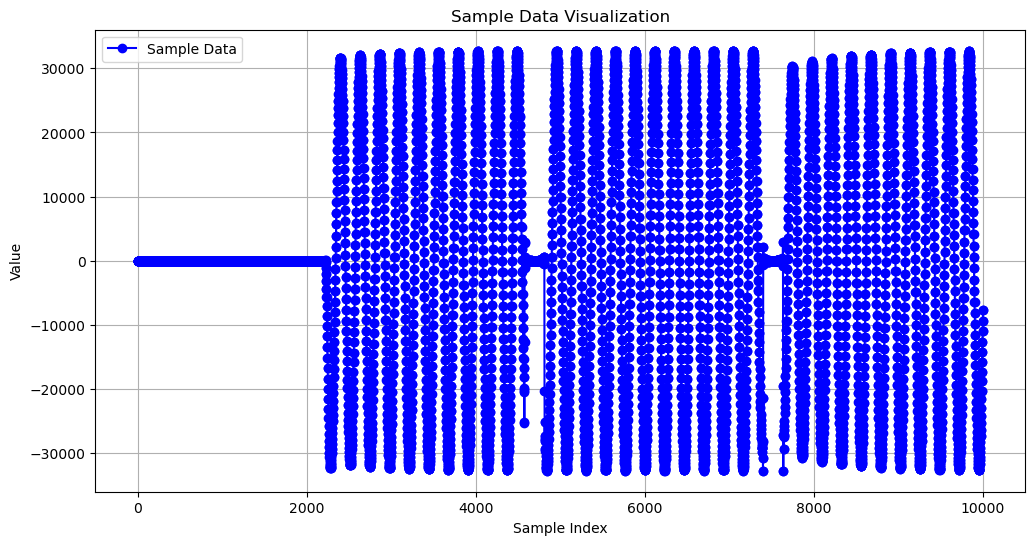

In [12]:
plot_output_data_onechannel('output3.txt', 10000)

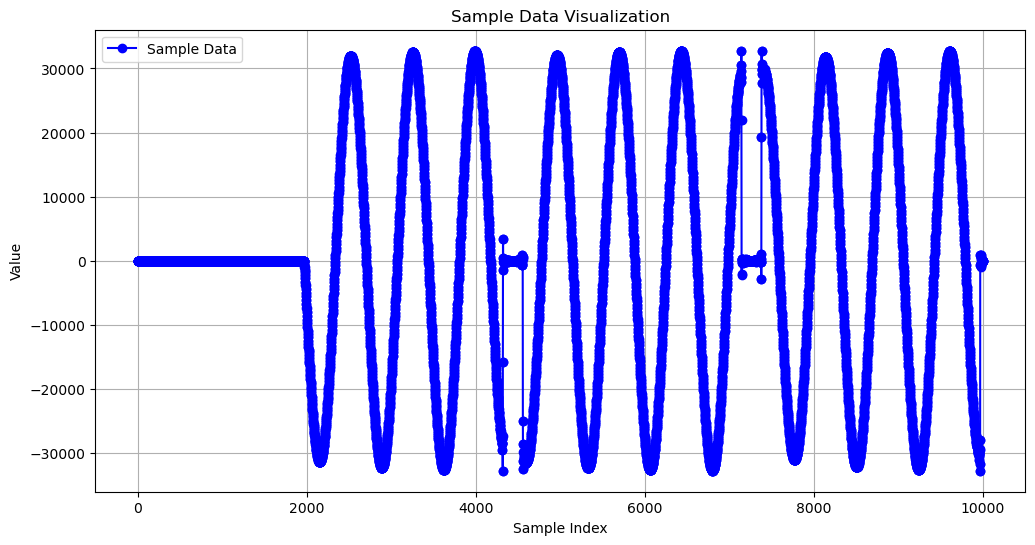

In [53]:
plot_output_data_onechannel('output4.txt',10000)

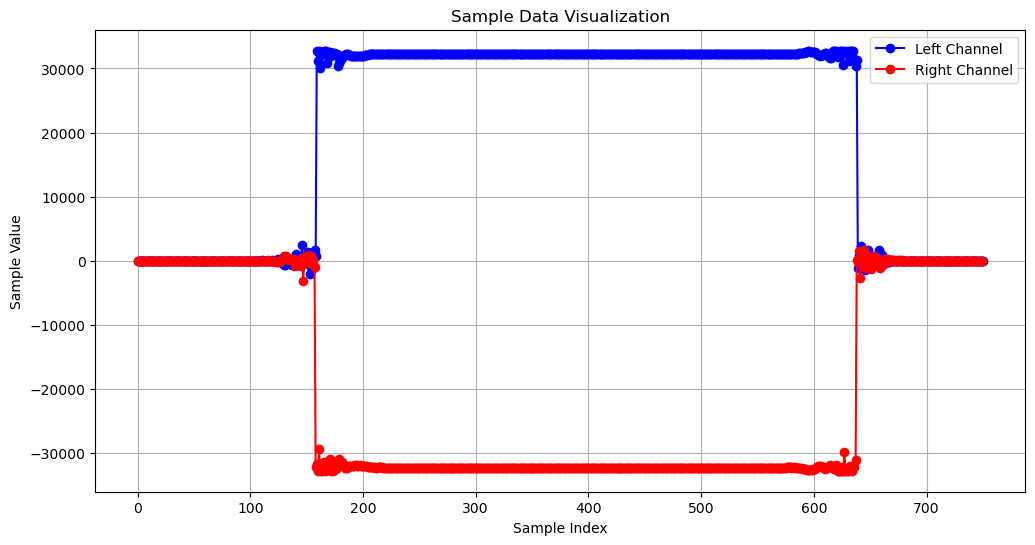

In [67]:
plot_output_data('output_flat_48.txt', 3000, 4500)

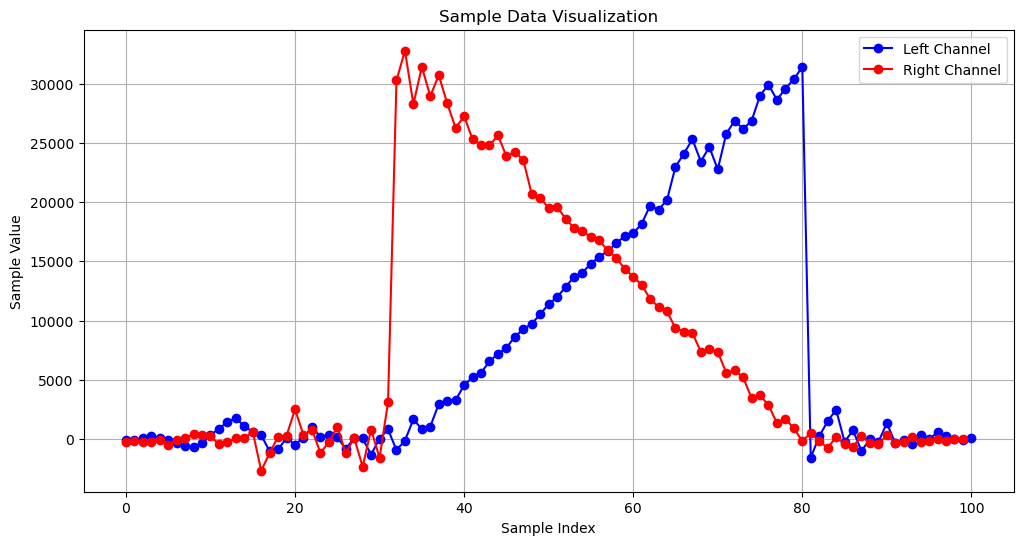

In [54]:
plot_output_data('output_linear_48.txt',4500, 4700)



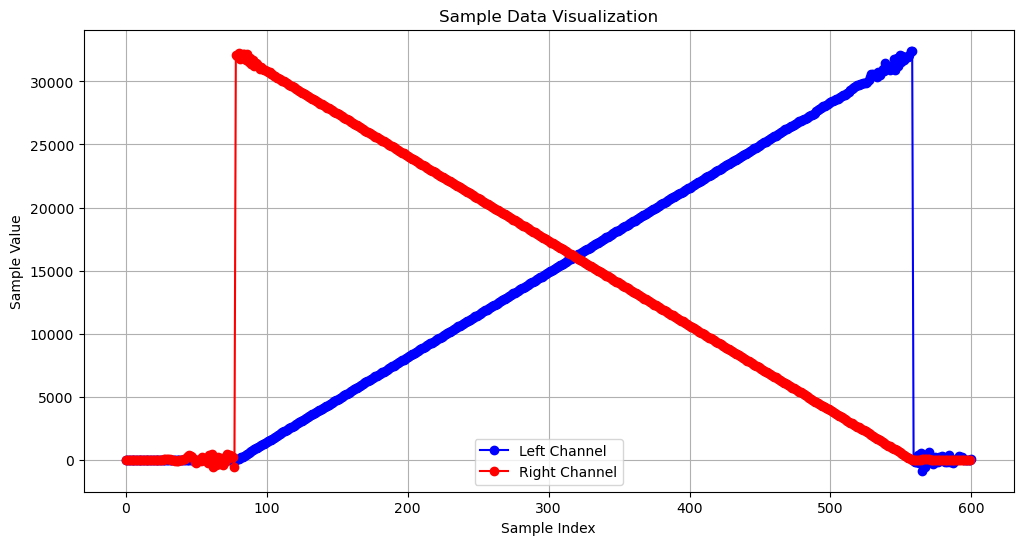

In [55]:
plot_output_data('output_linear_480.txt',2200,3400)

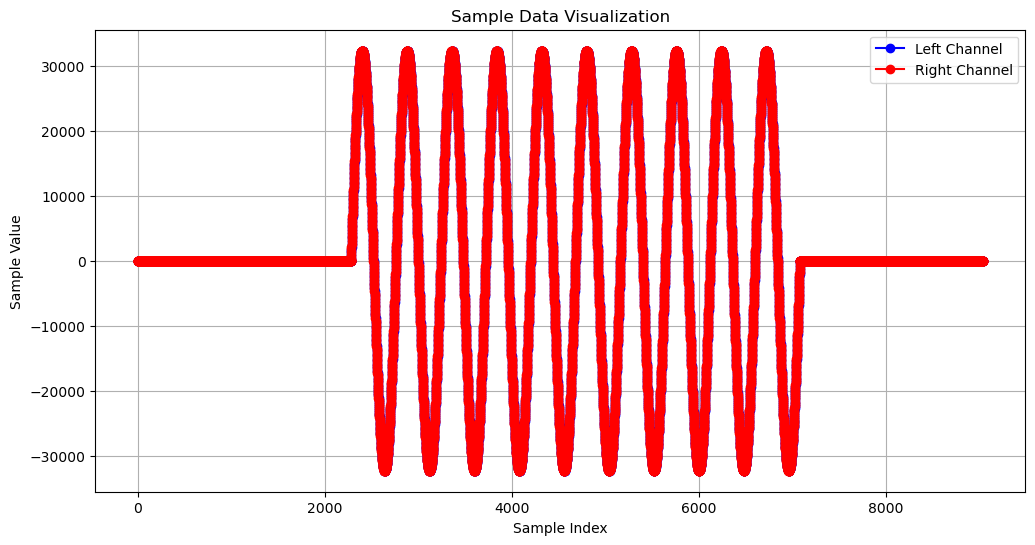

In [70]:
plot_output_data('output_sine_100_10.txt')

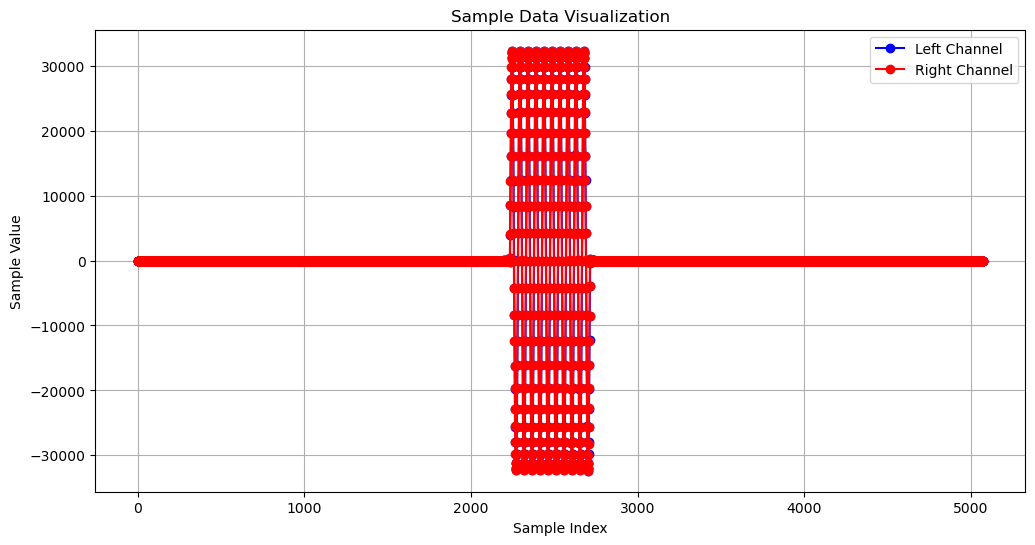

In [74]:
plot_output_data('output_sine_1000_10.txt')

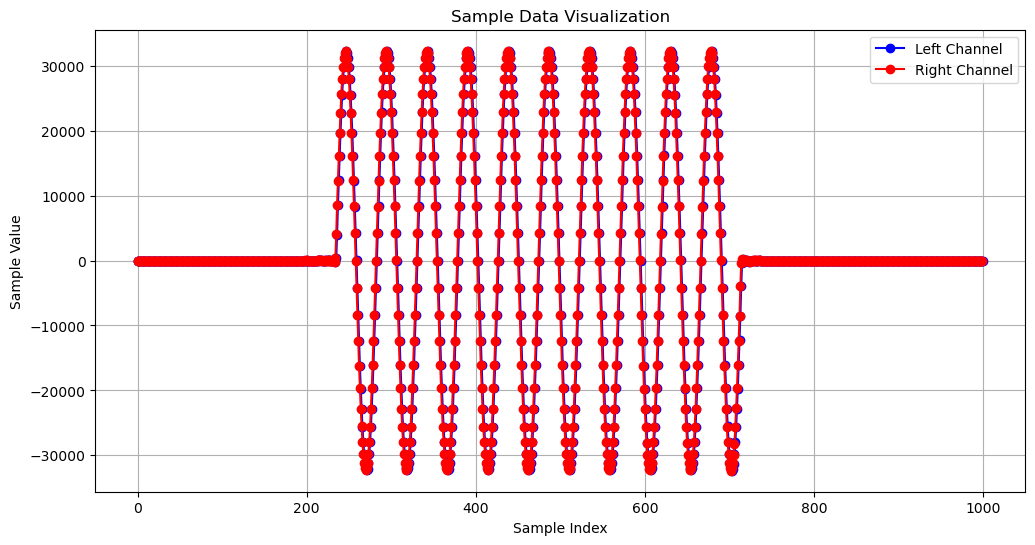

In [73]:
plot_output_data('output_sine_1000_10.txt', 4000, 6000)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_output_data(file_path, start_sample=0, end_sample=None, max_samples=None, sample_rate=48000):
    # Initialize lists to hold the values for both channels
    left_channel = []
    right_channel = []
    index = 0

    # Open the file and process each line
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()  # Clean spaces and newline characters
            if line.startswith('Sample'):  # Check if the line contains sample data
                if index >= start_sample and (end_sample is None or index <= end_sample):
                    sample_value = int(line.split(': ')[1])
                    
                    # Assign samples to channels based on their index (even or odd)
                    if index % 2 == 0:
                        left_channel.append(sample_value)
                    else:
                        right_channel.append(sample_value)
                
                index += 1
                
                # Break the loop if the maximum number of samples has been reached
                if max_samples is not None and len(left_channel) + len(right_channel) >= max_samples:
                    break
    
    # Convert lists to numpy arrays
    left_channel = np.array(left_channel)
    right_channel = np.array(right_channel)
    
    # Find the start and end of the sine wave part
    threshold = 1000  # This is an example threshold, adjust based on your signal
    sine_start = np.argmax(np.abs(left_channel) > threshold)
    sine_end = len(left_channel) - np.argmax(np.abs(left_channel[::-1]) > threshold) - 1

    sine_wave_samples = left_channel[sine_start:sine_end+1]

    # Perform FFT on the entire left channel
    fft_left = np.fft.fft(left_channel)
    fft_freqs = np.fft.fftfreq(len(left_channel), 1/sample_rate)

    # Find the peak frequency
    peak_freq_index = np.argmax(np.abs(fft_left[:len(fft_left)//2]))
    peak_frequency = np.abs(fft_freqs[peak_freq_index])
    
    # Calculate the duration of the sine wave part in seconds
    sine_duration = len(sine_wave_samples) / sample_rate
    
    # Calculate the number of cycles in the sine wave part
    num_cycles = sine_duration * peak_frequency
    
    # Plot the time domain data
    plt.figure(figsize=(14, 7))
    
    plt.subplot(2, 1, 1)
    plt.plot(left_channel, label='Left Channel')
    plt.axvline(x=sine_start, color='r', linestyle='--', label='Sine Wave Start')
    plt.axvline(x=sine_end, color='g', linestyle='--', label='Sine Wave End')
    plt.title('Time Domain Signal')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plot the frequency domain data
    plt.subplot(2, 1, 2)
    plt.plot(fft_freqs[:len(fft_freqs)//2], np.abs(fft_left)[:len(fft_left)//2], label='FFT of Left Channel')
    plt.title(f'Frequency Domain Signal (Peak Frequency: {peak_frequency:.2f} Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"Peak Frequency: {peak_frequency:.2f} Hz")
    print(f"Sine Wave Duration: {sine_duration:.2f} seconds")
    print(f"Number of Cycles: {num_cycles:.2f}")
    print(f"Number of Samples in Sine Wave Part: {len(sine_wave_samples)}")



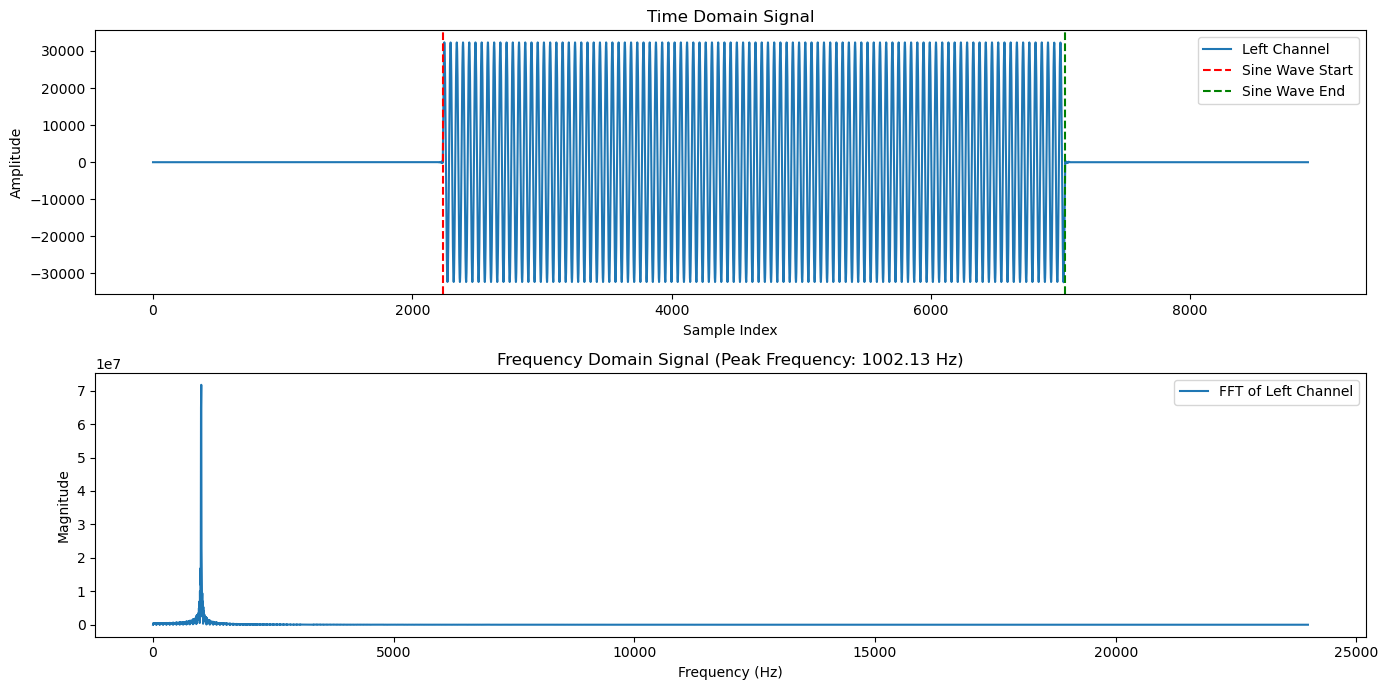

Peak Frequency: 1002.13 Hz
Sine Wave Duration: 0.10 seconds
Number of Cycles: 100.19
Number of Samples in Sine Wave Part: 4799


In [15]:
analyze_output_data('output_1000_100.txt')

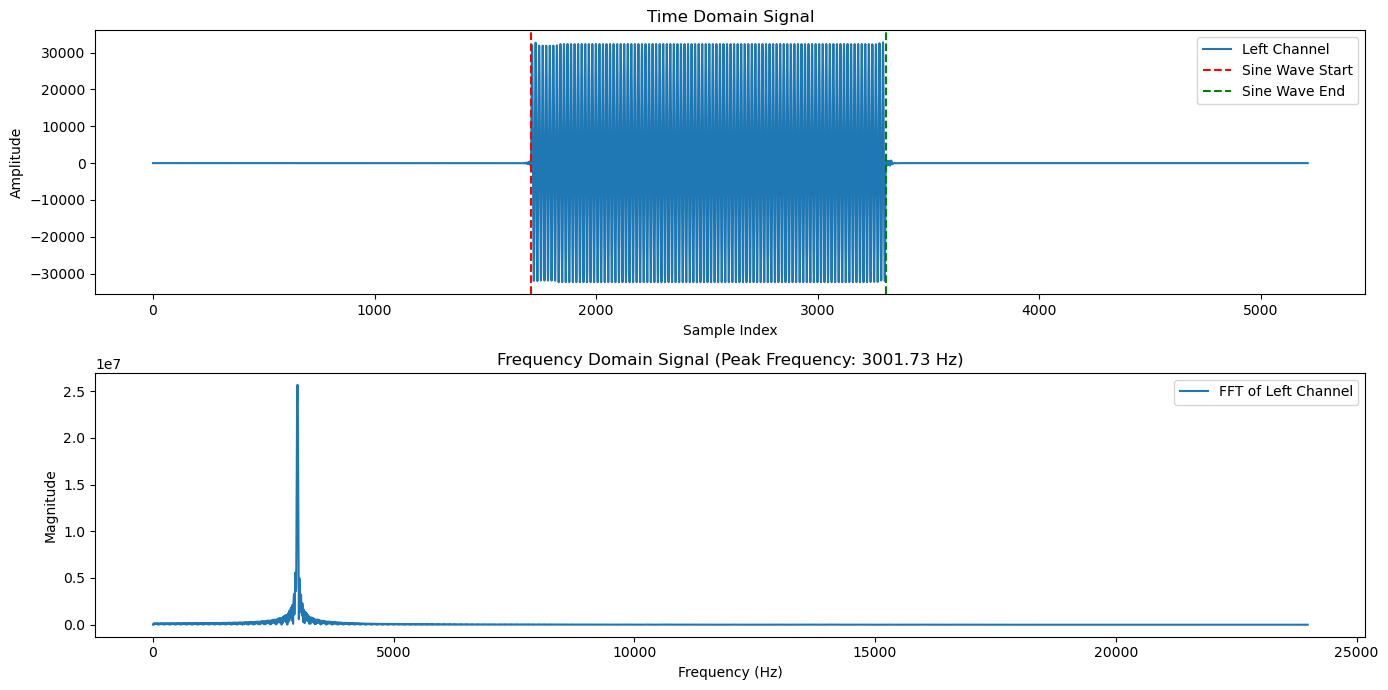

Peak Frequency: 3001.73 Hz
Sine Wave Duration: 0.03 seconds
Number of Cycles: 100.12
Number of Samples in Sine Wave Part: 1601


In [16]:
analyze_output_data('output_3000_100.txt')

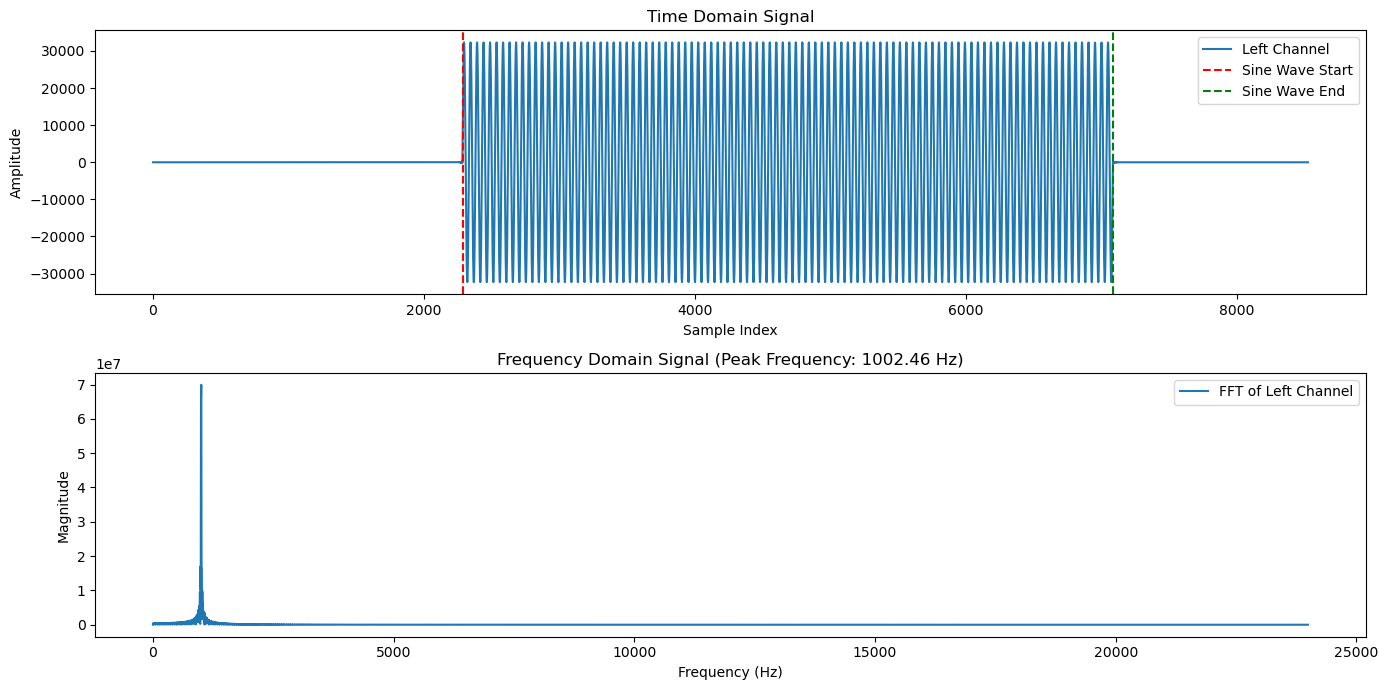

Peak Frequency: 1002.46 Hz
Sine Wave Duration: 0.10 seconds
Number of Cycles: 100.23
Number of Samples in Sine Wave Part: 4799


In [17]:
analyze_output_data('output_1000_100_freq_2chan.txt')


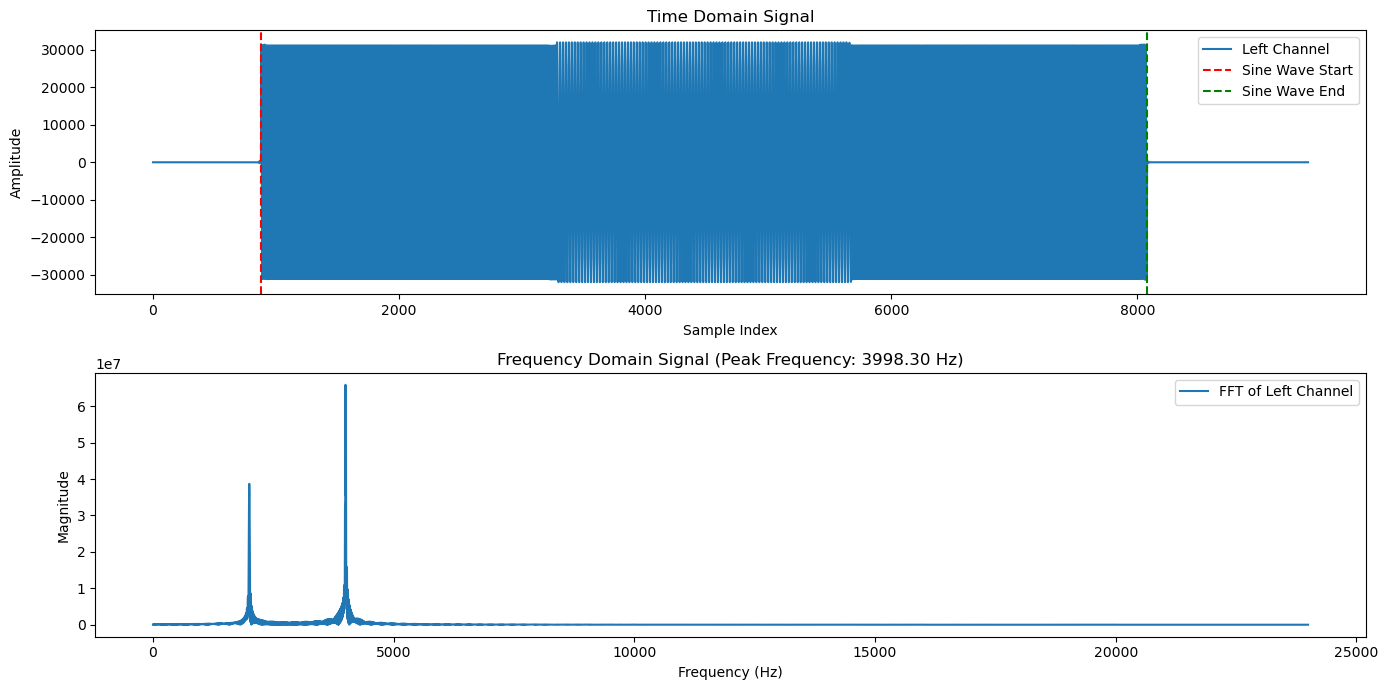

Peak Frequency: 3998.30 Hz
Sine Wave Duration: 0.15 seconds
Number of Cycles: 599.74
Number of Samples in Sine Wave Part: 7200


In [3]:

analyze_output_data('output_101_freq.txt')
